<a href="https://colab.research.google.com/github/jasman7/nhl-ce/blob/main/CE_Project_Jason_Manuele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CE Project

---


Jason Manuele, 2038818:

---


Hockey Player Analysis: Does Size Matter in the NHL? 

There is a certain stigma in sports- especially in North American sports- that you need be a certain height and weight to be a good player. The NHL is one of the major sports affected by this stigma. While size mattering in the NBA or NFL migt make more sense, the technical intricacies of hockey beg the question: Is size really necessary to be a successful NHL player? Many rookies in the NHL entry draft either drop down spots or are not even drafted despite their skill because of their small stature. A prime example of this is former Tampa Bay Lighning Captain Martin St. Louis, who didn't get drafted in large part due to his 5' 8" size. After impressing teams in the college level, he got a shot in the NHL and retired with over 1000 NHL points. Is he simply an outlier, or are there other players that have shown great success despite their smaller stature such as Brad Marchand, Johnny Gaudreau, Alex DeBrincat, Torey Krug and Brendan Gallagher. In this project, I will analyze the importance of size in the NHL and if there is any strong correlation between size and scoring ability, physicality and durability. 

In [239]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

In [240]:
#Paths to data sets

bio_info ="https://raw.githubusercontent.com/jasman7/nhl-ce/main/nhl_bio_2020.csv"
player_stats ="https://raw.githubusercontent.com/jasman7/nhl-ce/main/skater_stats.csv"

In [241]:
df_bio=pd.read_csv(bio_info)
df_stats=pd.read_csv(player_stats,encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.



In [242]:
df_stats["Player"].sample(25)

26474         Jyrki Seppa
20680           Rob Brown
33577      Keith McCreary
33777       Larry Hillman
36447        Ken Reardon*
7825        Warren Peters
16016        Esa Tikkanen
24580     Craig Duncanson
14105        Jody Shelley
9397          Glen Wesley
22981           Mark Lamb
29808     Lanny McDonald*
15511           Joe Sacco
9012     Dustin Byfuglien
28356          Tom Bladon
2234       Kyle Chipchura
9517          Eric Godard
5826       David Ullstrom
5476         Jason Arnott
17948        Ethan Moreau
11040        Jeff Friesen
19994      Sandy McCarthy
10843    Mattias Norstrom
25653       Doug Gilmour*
11046         Kirk Maltby
Name: Player, dtype: object

In [243]:
df_stats[["first_name","last_name"]]=df_stats['Player'].str.split(' ',n=1, expand=True)
#df_stats.drop(df_stats[df_stats.Season < 2015].index)

This below is the first dataset we will be utilizing to make some data, with 

In [244]:
df_nhl = pd.merge(
    df_bio,
    df_stats,
    on = ["first_name","last_name"]
)
df_nhl_set1=df_nhl[["first_name","last_name","Season","Pos","GP","G","A","PTS","HIT","BLK","weight","height","Age"]]

In [245]:
df_nhl_set1.sample(10)
#[df_nhl_set1["last_name"]=="Marchand"]
#df_stats[df_stats["last_name"]=="St. Louis"]["PTS"]

,first_name,last_name,Season,Pos,GP,G,A,PTS,HIT,BLK,weight,height,Age
2436,Patrick,Marleau,2013,C,48,17,14,31,38.0,13.0,215,"6' 2""",33.0
659,Corey,Perry,2008,RW,70,29,25,54,95.0,11.0,206,"6' 3""",22.0
173,Nick,Leddy,2016,D,81,5,35,40,83.0,87.0,207,"6' 0""",24.0
1639,Colton,Sissons,2016,C,34,4,2,6,35.0,20.0,200,"6' 1""",22.0
1805,Michael,Stone,2014,D,70,8,13,21,153.0,114.0,210,"6' 3""",23.0
787,Ryan,Dzingel,2018,LW,79,23,18,41,60.0,19.0,190,"6' 0""",25.0
1494,Sam,Gagner,2012,C,75,18,29,47,21.0,23.0,200,"5' 11""",22.0
1301,Brenden,Dillon,2015,D,80,2,8,10,154.0,139.0,220,"6' 4""",24.0
2570,Scott,Harrington,2015,D,10,-,-,-,12.0,10.0,206,"6' 2""",21.0
770,Micheal,Haley,2017,C,58,2,10,12,129.0,23.0,213,"5' 11""",30.0


In [246]:
df_nhl_set1['PTS'].value_counts()

 -       185
 1       107
 2        70
 3        65
 7        58
        ... 
 125       1
 114       1
 96        1
 104       1
 94        1
Name: PTS, Length: 113, dtype: int64

In [247]:
#Need to replace all "-" with 0 in goals, assists and points columns to that they can be converted to integers. 

df_nhl_set1['PTS'].mask(df_nhl_set1['PTS']==" -   ", 0, inplace=True)
df_nhl_set1['G'].mask(df_nhl_set1['G']==" -   ", 0, inplace=True)
df_nhl_set1['A'].mask(df_nhl_set1['A']==" -   ", 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
#Convert the objects into integers

df_nhl_set1['PTS'] = df_nhl_set1['PTS'].astype(int)
df_nhl_set1['G'] = df_nhl_set1['G'].astype(int)
df_nhl_set1['A'] = df_nhl_set1['A'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [249]:
df_nhl_set1[df_nhl_set1["A"]>=75]

,first_name,last_name,Season,Pos,GP,G,A,PTS,HIT,BLK,weight,height,Age
358,Evgeni,Malkin,2009,C,82,35,78,113,80.0,39.0,195,"6' 3""",22.0
372,Sidney,Crosby,2007,C,79,36,84,120,NaN,NaN,200,"5' 11""",19.0
832,Joe,Thornton,2007,C,82,22,92,114,NaN,NaN,220,"6' 4""",27.0
833,Joe,Thornton,2006,C,81,29,96,125,NaN,NaN,220,"6' 4""",26.0


In [250]:
#Removing older data in which we do not have staats on hits and other data 
df_nhl_set1.drop(df_nhl_set1[df_nhl_set1.Season < 2008].index, inplace=True)
df_nhl_set1["Season"].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2018    556
2017    488
2016    412
2015    328
2014    278
2013    228
2012    185
2011    145
2010    113
2009     87
2008     64
Name: Season, dtype: int64

In [251]:
df_nhl_set1[df_nhl_set1["last_name"]=="Aho"]
#REUPLOAD ON GITHUB TO KILL AHO

,first_name,last_name,Season,Pos,GP,G,A,PTS,HIT,BLK,weight,height,Age
216,Sebastian,Aho,2018,RW,78,29,36,65,65.0,17.0,184,"5' 10""",20.0
217,Sebastian,Aho,2018,D,22,1,3,4,10.0,13.0,184,"5' 10""",21.0
218,Sebastian,Aho,2017,RW,82,24,25,49,51.0,14.0,184,"5' 10""",19.0
219,Sebastian,Aho,2018,RW,78,29,36,65,65.0,17.0,176,"6' 0""",20.0
220,Sebastian,Aho,2018,D,22,1,3,4,10.0,13.0,176,"6' 0""",21.0
221,Sebastian,Aho,2017,RW,82,24,25,49,51.0,14.0,176,"6' 0""",19.0


In [252]:
df_nhl_set1=df_nhl_set1.sort_values("Season",ascending=True)

# **plan**

1.   Make a graph that show the distribution of height. make a graph for each year from 2008 to 2018
2.   make a graph showing the mean weight per year. 

3.   points per height, goals per height, assist per height
4.   aniamted graph: animate: average ppg per height, time= years, size= height.
5. aniamted graph: average hits pg per height, time=years, size=height 




In [253]:
df_nhl_set1[df_nhl_set1["Season"]==2008]["weight"].mean()

204.265625

Text(0.5, 1.0, 'Count of players height distribution in 2008 ')

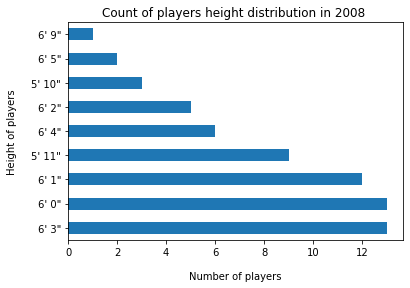

In [254]:
df_nhl_set1[df_nhl_set1["Season"]==2008]["height"].value_counts().plot(kind='barh')
plt.ylabel("Height of players", labelpad=14)
plt.xlabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2008 ")

Text(0.5, 1.0, 'Count of players height distribution in 2009')

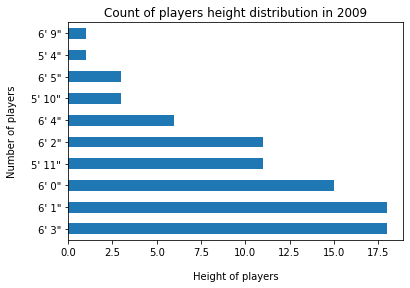

In [255]:
df_nhl_set1[df_nhl_set1["Season"]==2009]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2009")

Text(0.5, 1.0, 'Count of players height distribution in 2010 ')

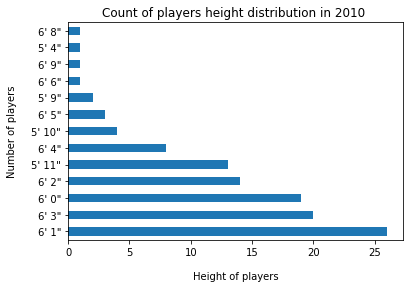

In [256]:
df_nhl_set1[df_nhl_set1["Season"]==2010]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2010 ")

Text(0.5, 1.0, 'Count of players height distribution in 2011 ')

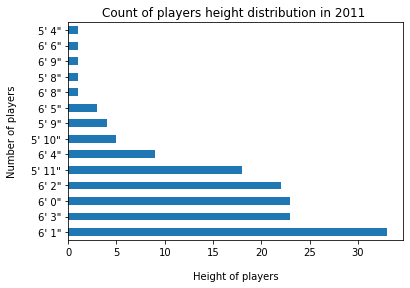

In [257]:
df_nhl_set1[df_nhl_set1["Season"]==2011]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2011 ")

Text(0.5, 1.0, 'Count of players height distribution in 2012 ')

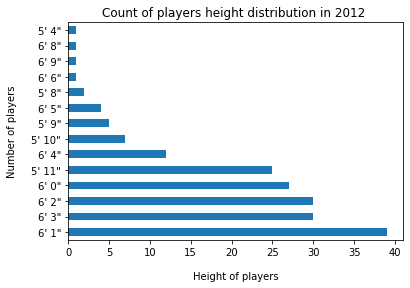

In [258]:
df_nhl_set1[df_nhl_set1["Season"]==2012]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2012 ")

Text(0.5, 1.0, 'Count of players height distribution in 2013 ')

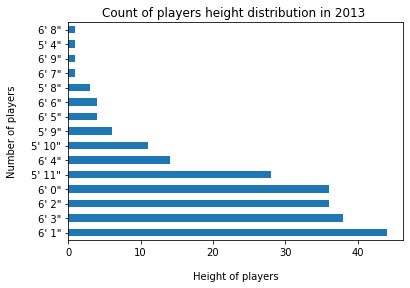

In [259]:
df_nhl_set1[df_nhl_set1["Season"]==2013]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2013 ")

Text(0.5, 1.0, 'Count of players height distribution in 2014 ')

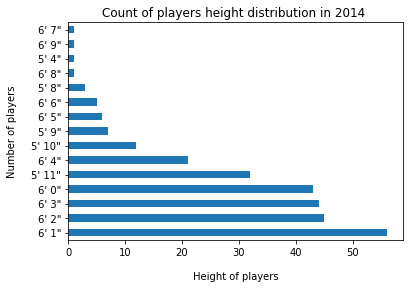

In [260]:
df_nhl_set1[df_nhl_set1["Season"]==2014]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2014 ")

Text(0.5, 1.0, 'Count of players height distribution in 2015 ')

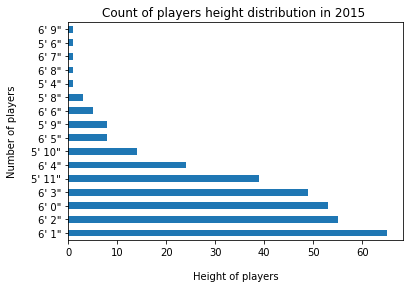

In [261]:
df_nhl_set1[df_nhl_set1["Season"]==2015]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2015 ")

Text(0.5, 1.0, 'Count of players height distribution in 2016 ')

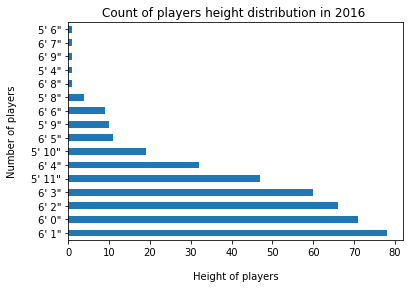

In [262]:
df_nhl_set1[df_nhl_set1["Season"]==2016]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2016 ")

Text(0.5, 1.0, 'Count of players height distribution in 2017 ')

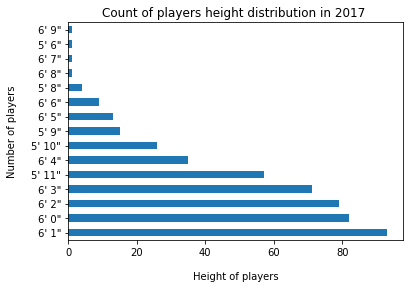

In [263]:
df_nhl_set1[df_nhl_set1["Season"]==2017]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2017 ")

Text(0.5, 1.0, 'Count of players height distribution in 2018 ')

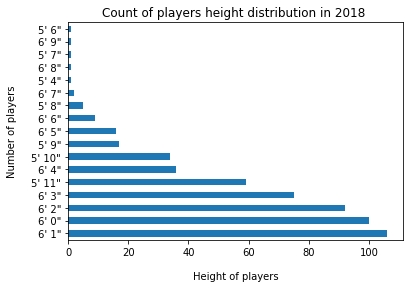

In [264]:
df_nhl_set1[df_nhl_set1["Season"]==2018]["height"].value_counts().plot(kind='barh')
plt.xlabel("Height of players", labelpad=14)
plt.ylabel("Number of players", labelpad=14)
plt.title("Count of players height distribution in 2018 ")

From analyzing these graphs, we can very easily tell that the players entering the league are larger and there is a widening gap betweenthe taller players ranging from 6 foot to 6 foot 3 with players under 6 foot. However, is this truly warranted? Do these larger players actually perform better? That is the question that will be analyzed. 

In [265]:
from os import wait4
w1=df_nhl_set1[df_nhl_set1["Season"]==2008]["weight"].mean()
w2=df_nhl_set1[df_nhl_set1["Season"]==2009]["weight"].mean()
w3=df_nhl_set1[df_nhl_set1["Season"]==2010]["weight"].mean()
w4=df_nhl_set1[df_nhl_set1["Season"]==2011]["weight"].mean()
w5=df_nhl_set1[df_nhl_set1["Season"]==2012]["weight"].mean()
w6=df_nhl_set1[df_nhl_set1["Season"]==2013]["weight"].mean()
w7=df_nhl_set1[df_nhl_set1["Season"]==2014]["weight"].mean()
w8=df_nhl_set1[df_nhl_set1["Season"]==2015]["weight"].mean()
w9=df_nhl_set1[df_nhl_set1["Season"]==2016]["weight"].mean()
w10=df_nhl_set1[df_nhl_set1["Season"]==2017]["weight"].mean()
w11=df_nhl_set1[df_nhl_set1["Season"]==2018]["weight"].mean()

weight_dict={2008:w1,2009:w2,2010:w3,2011:w4,2012:w5,2013:w6,2014:w7,2015:w8,2016:w9,2017:w10,2018:w11}

print(weight_dict)

{2008: 204.265625, 2009: 203.29885057471265, 2010: 203.8053097345133, 2011: 202.88275862068966, 2012: 202.72972972972974, 2013: 202.53070175438597, 2014: 202.85971223021582, 2015: 202.4420731707317, 2016: 202.1747572815534, 2017: 201.06352459016392, 2018: 200.16546762589928}


There is a slight decreased observed in the average weight as we go through the years. A possible reason for this si the younger players have yet to bulk up adn grow to their maximum size. However, could heavier older players mean that the older players are more durable and able to play for longer periods of time? 

**The following graph displays the amount of games played in a single season by players organized by their height to display if there is any significant difference in the types of players more likely to play an entire season, where that be due to injuries or healthy scratches.**

In [266]:
df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()
#df_nhl_set1["GP AVG"]=df_nhl_set1.groupby('height')['GP'].transform('sum')

6' 1"     570
6' 0"     482
6' 2"     455
6' 3"     441
5' 11"    338
6' 4"     203
5' 10"    138
5' 9"      74
6' 5"      73
6' 6"      44
5' 8"      25
6' 9"      11
5' 4"       9
6' 8"       9
6' 7"       7
5' 6"       4
5' 7"       1
Name: height, dtype: int64

Text(0.5, 1.0, 'Height for more than 75 GP')

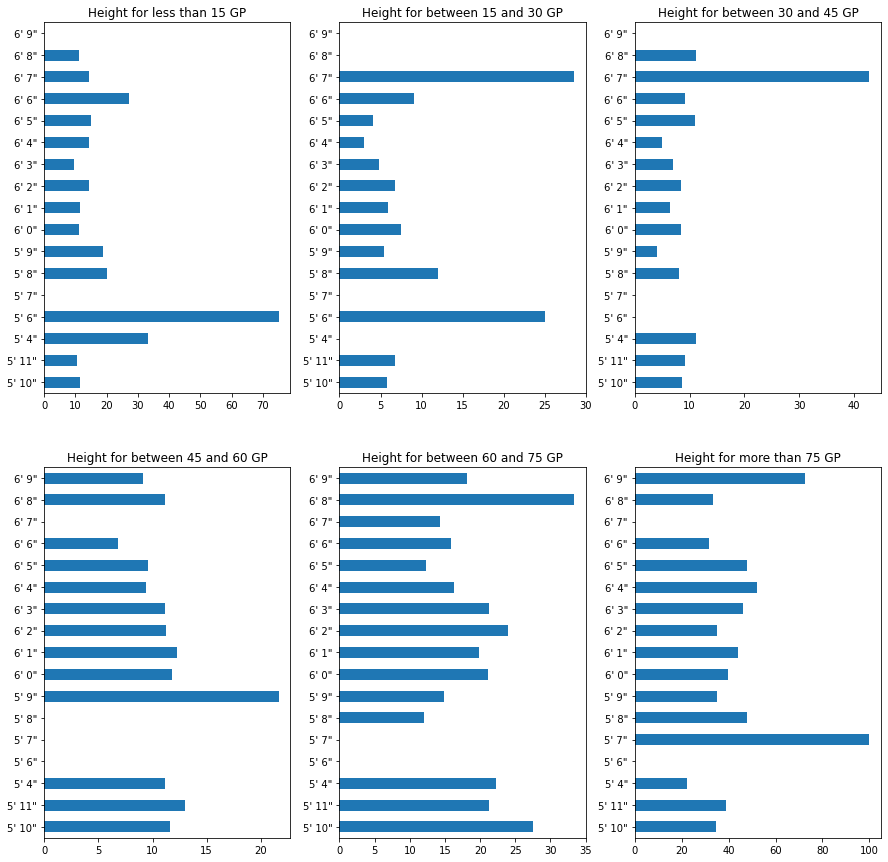

In [267]:
#Percentage of players in each height category distributed by amount of games played
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,15))

(df_nhl_set1[df_nhl_set1["GP"]<15]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[0,0],kind="barh").set_title("Height for less than 15 GP")
(df_nhl_set1[(df_nhl_set1["GP"]<30) & (df_nhl_set1["GP"]>=15)]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[0,1],kind="barh").set_title("Height for between 15 and 30 GP")
(df_nhl_set1[(df_nhl_set1["GP"]<45) & (df_nhl_set1["GP"]>=30)]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[0,2],kind="barh").set_title("Height for between 30 and 45 GP")
(df_nhl_set1[(df_nhl_set1["GP"]<60) & (df_nhl_set1["GP"]>=45)]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[1,0],kind="barh").set_title("Height for between 45 and 60 GP")
(df_nhl_set1[(df_nhl_set1["GP"]<75) & (df_nhl_set1["GP"]>=60)]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[1,1],kind="barh").set_title("Height for between 60 and 75 GP")
(df_nhl_set1[df_nhl_set1["GP"]>=75]["height"].value_counts()*100/df_nhl_set1[df_nhl_set1["GP"]>=0]["height"].value_counts()).plot(ax=axes[1,2],kind="barh").set_title("Height for more than 75 GP")

# Graph Analysis: Do Bigger Players Play More? 


In [268]:
#Points per Game 
df_nhl_set1["PPG"]= df_nhl_set1["PTS"]/df_nhl_set1["GP"]

df_nhl_set1

,first_name,last_name,Season,Pos,GP,G,A,PTS,HIT,BLK,weight,height,Age,PPG
125,Cal,Clutterbuck,2008,RW,2,0,0,0,4.0,1.0,215,"5' 11""",20.0,0.000000
2283,Joe,Pavelski,2008,C,82,19,21,40,67.0,59.0,195,"5' 11""",23.0,0.487805
1460,Frans,Nielsen,2008,C,16,2,1,3,4.0,8.0,186,"6' 1""",23.0,0.187500
672,Shea,Weber,2008,D,54,6,14,20,115.0,44.0,229,"6' 4""",22.0,0.370370
659,Corey,Perry,2008,RW,70,29,25,54,95.0,11.0,206,"6' 3""",22.0,0.771429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Marco,Scandella,2018,D,82,5,17,22,91.0,114.0,212,"6' 3""",27.0,0.268293
1681,Mike,Hoffman,2018,LW,82,22,34,56,31.0,34.0,182,"6' 0""",28.0,0.682927
1691,Tyler,Bozak,2018,C,81,11,32,43,43.0,28.0,199,"6' 1""",31.0,0.530864
1631,Filip,Forsberg,2018,LW,67,26,38,64,86.0,37.0,205,"6' 1""",23.0,0.955224


In [269]:
color_mapping = {
    "6\' 9\"": "red",
    "6\' 8\"": "red",
    "6\' 7\"": "red",
    "6\' 6\"": "orange",
    "6\' 5\"": "orange",
    "6\' 4\"": "orange",
    "6\' 3\"":"yellow",
    "6\' 2\"":"yellow",
    "6\' 1\"":"green",
    "6\' 0\"":"green",
    "5\' 11\"":"blue",
    "5\' 10\"":"blue",
    "5\' 9\"":"purple",
    "5\' 8\"":"purple",
    "5\' 7\"":"purple",
    "5\' 6\"":"black",
    "5\' 4\"":"black",
    
}
df_nhl_set1["height color"] = df_nhl_set1["height"].map(color_mapping)


In [270]:
year_list=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

fig=px.scatter(
df_nhl_set1, x="weight", y="PTS",
animation_frame="Season", color="height", hover_name="last_name",
size_max = 15,
title=("Animation of Points per Season Sepeerated by Weight and Height"),
range_x=[160,260], range_y=[1,100],
log_x=True, log_y=True,

)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig

In [271]:
df_nhl_set1["Season"].value_counts()

2018    556
2017    488
2016    412
2015    328
2014    278
2013    228
2012    185
2011    145
2010    113
2009     87
2008     64
Name: Season, dtype: int64

In [272]:
fig2=px.scatter(
df_nhl_set1, x="weight", y="HIT",
animation_frame="Season", color="height", hover_name="last_name",
size_max = 15,
title=("Animation of Hits per Season Sepeerated by Weight and Height"),
range_x=[160,260], range_y=[1,300],
log_x=True, log_y=True,

)
fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig2

In [273]:
fig3=px.scatter(
df_nhl_set1, x="weight", y="BLK",
animation_frame="Season", color="height", hover_name="last_name",
size_max = 15,
title=("Animation of Blocked Shots per Season Separated by Weight and Height"),
range_x=[160,260], range_y=[1,300],
log_x=True, log_y=True,

)
fig3.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig3